# Convolutional Neural Networks

# Project: Algorithm for a Dog Identification App 

At the end of this project, the code will accept any image provided by the user as input. If a dog is detected in the image, it will provide an estimate of the dog's breed. If a human being is detected, it will provide an estimate of the dog breed that most resembles.

![Sample Dog Output](images/sample_dog_output.png)

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('/data/dog_images/train')
valid_files, valid_targets = load_dataset('/data/dog_images/valid')
test_files, test_targets = load_dataset('/data/dog_images/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

print(sorted(dog_names))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.
['in/001.Affenpinscher', 'in/002.Afghan_hound', 'in/003.Airedale_terrier', 'in/004.Akita', 'in/005.Alaskan_malamute', 'in/006.American_eskimo_dog', 'in/007.American_foxhound', 'in/008.American_staffordshire_terrier', 'in/009.American_water_spaniel', 'in/010.Anatolian_shepherd_dog', 'in/011.Australian_cattle_dog', 'in/012.Australian_shepherd', 'in/013.Australian_terrier', 'in/014.Basenji', 'in/015.Basset_hound', 'in/016.Beagle', 'in/017.Bearded_collie', 'in/018.Beauceron', 'in/019.Bedlington_terrier', 'in/020.Belgian_malinois', 'in/021.Belgian_sheepdog', 'in/022.Belgian_tervuren', 'in/023.Bernese_mountain_dog', 'in/024.Bichon_frise', 'in/025.Black_and_tan_coonhound', 'in/026.Black_russian_terrier', 'in/027.Bloodhound', 'in/028.Bluetick_coonhound', 'in/029.Border_collie', 'in/030.Border_terrier', 'in/031.Borzoi', 'in

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("/data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


## Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


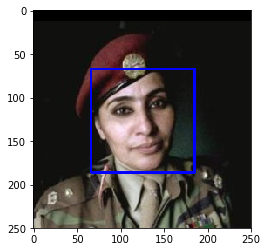

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

print("% of human face detected in human_files_short : ",
      ([face_detector(img) for img in human_files_short].count(True) * 100 )/len(human_files_short), "%" )
      
print("% of human face detected in dog_files_short : ",
      ([face_detector(img) for img in dog_files_short].count(True) * 100 )/len(dog_files_short), "%" )


% of human face detected in human_files_short :  100.0 %
% of human face detected in dog_files_short :  11.0 %


In [6]:
## Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

#Approach II: OPENCV LBP CASCADE CLASSIFIER
#load cascade classifier training file for lbpcascade
lbp_face_cascade_class = cv2.CascadeClassifier('lbpcascades/lbpcascade_frontalface_improved.xml')  
    
def lbp_face_detector(img_path):
    return len(lbp_face_cascade_class.detectMultiScale(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)))
    
print("% of human face detected in human_files_short (LBP): ",
      ([lbp_face_detector(img) for img in human_files_short].count(True) * 100 )/len(human_files_short), "%" )

print("% of human face detected in dog_files_short (LBP) : ",
      ([lbp_face_detector(img) for img in dog_files_short].count(True) * 100 )/len(dog_files_short), "%" )


% of human face detected in human_files_short (LBP):  87.0 %
% of human face detected in dog_files_short (LBP) :  1.0 %


## Detect Dogs

In [7]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 6s 0us/step


In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

In [9]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### Assess the Dog Detector

In [11]:
### The performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

print("% of face humans detected as a dog in human_files_short (ResNet50) : ",
      ([dog_detector(img) for img in human_files_short].count(True) * 100 )/len(human_files_short), "%" )
      
print("% of dogs detected as a dogs in dog_files_short (ResNet50): ",
      ([dog_detector(img) for img in dog_files_short].count(True) * 100 )/len(dog_files_short), "%" )


% of face humans detected as a dog in human_files_short (ResNet50) :  0.0 %
% of dogs detected as a dogs in dog_files_short (ResNet50):  100.0 %


In [12]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:09<00:00, 85.60it/s] 


In [13]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

### Define your architecture.

# Standard sequential modeling approach
model = Sequential()

# Conv layers followed by MaxPooling layer
model.add(Conv2D(filters = 32, 
                        kernel_size = 3, 
                        padding = 'same', 
                        activation = 'relu', 
                        input_shape = (train_tensors[0].shape)))

model.add(MaxPooling2D(pool_size = 3))

# Conv layers followed by MaxPooling layer
model.add(Conv2D(filters = 64, 
                        kernel_size = 3, 
                        padding = 'same', 
                        activation = 'relu'))

model.add(MaxPooling2D(pool_size = 3))

# Conv layers followed by MaxPooling layer
model.add(Conv2D(filters = 128, 
                        kernel_size = 3, 
                        padding = 'same', 
                        activation = 'relu'))

model.add(MaxPooling2D(pool_size = 3))

# Dropout layer (set to drop 40% connections) to reduce overfitting
model.add(Dropout(0.4))

# GAP( Global Average Pooling), aggressive way to reduce dimensionality 
model.add(GlobalAveragePooling2D())

# Dense layer
model.add(Dense(512, activation = 'relu'))

# Dropout layer (set to drop 40% connections) to reduce overfitting
model.add(Dropout(0.4))

# Final dense layer used for classification task 
model.add(Dense(133, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
__________

### Compile the Model

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###  Train the Model

In [15]:
from keras.callbacks import ModelCheckpoint  

### specify the number of epochs that you would like to use to train the model.

epochs = 10

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/10
6680/6680 [==============================] - 25s 4ms/step - loss: 4.8855 - acc: 0.0063 - val_loss: 4.8657 - val_acc: 0.0108
Epoch 2/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.8560 - acc: 0.0112 - val_loss: 4.8295 - val_acc: 0.0180
Epoch 3/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.7807 - acc: 0.0183 - val_loss: 4.7236 - val_acc: 0.0192
Epoch 4/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.6971 - acc: 0.0253 - val_loss: 4.6630 - val_acc: 0.0359
Epoch 5/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.6211 - acc: 0.0284 - val_loss: 4.6143 - val_acc: 0.0228
Epoch 6/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.5284 - acc: 0.0332 - val_loss: 4.5626 - val_acc: 0.0323
Epoch 7/10
6680/6680 [==============================] - 24s 4ms/step - loss: 4.4350 - acc: 0.0395 - val_loss: 4.5325 - val_acc: 0.0431
Epoch 8/

### Load the Model with the Best Validation Loss

In [16]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

In [17]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 6.3397%


## Use a CNN to Classify Dog Breeds
### Obtain Bottleneck Features

In [18]:
bottleneck_features = np.load('/data/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [19]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [20]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [21]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 346us/step - loss: 12.2008 - acc: 0.1246 - val_loss: 10.8685 - val_acc: 0.2012
Epoch 2/20
6680/6680 [==============================] - 2s 279us/step - loss: 10.0666 - acc: 0.2864 - val_loss: 10.0413 - val_acc: 0.2778
Epoch 3/20
6680/6680 [==============================] - 2s 294us/step - loss: 9.4831 - acc: 0.3422 - val_loss: 9.8718 - val_acc: 0.3030
Epoch 4/20
6680/6680 [==============================] - 2s 279us/step - loss: 9.2005 - acc: 0.3765 - val_loss: 9.6797 - val_acc: 0.3174
Epoch 5/20
6680/6680 [==============================] - 2s 281us/step - loss: 9.0128 - acc: 0.3940 - val_loss: 9.3580 - val_acc: 0.3425
Epoch 6/20
6680/6680 [==============================] - 2s 255us/step - loss: 8.7905 - acc: 0.4132 - val_loss: 9.3038 - val_acc: 0.3377
Epoch 7/20
6680/6680 [==============================] - 2s 249us/step - loss: 8.6346 - acc: 0.4293 - val_loss: 9.2248 - val_acc: 0.35

### Load the Model with the Best Validation Loss

In [22]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [23]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 40.0718%


### Predict Dog Breed with the Model

In [24]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [25]:
### Obtain bottleneck features from another pre-trained CNN.

bottleneck_features = np.load('/data/bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']


In [26]:
### Define your architecture.
Resnet50_model = Sequential()

# GAP( Global Average Pooling) : aggressive way to reduce dimensionality 
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))

Resnet50_model.add(Dense(len(dog_names), activation='softmax'))
# Dropout layer (set to drop 30% connections) to reduce overfitting.
Resnet50_model.add(Dropout(0.3))

Resnet50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
_________________________________________________________________
dropout_3 (Dropout)          (None, 133)               0         
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [27]:
### Compile the model.

Resnet50_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the Model

In [3]:
### Train the model.

print(valid_Resnet50.shape[1:])
epoch = 32
batch = 23

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.ResNet50.hdf5', 
                               verbose=1, save_best_only=True)

Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=epoch, batch_size=batch, callbacks=[checkpointer], verbose=1)


'"\nepoch = 32\nbatch = 23\n\ncheckpointer = ModelCheckpoint(filepath=\'saved_models/weights.best.ResNet50.hdf5\', \n                               verbose=1, save_best_only=True)\n\nResnet50_model.fit(train_Resnet50, train_targets, \n          validation_data=(valid_Resnet50, valid_targets),\n          epochs=epoch, batch_size=batch, callbacks=[checkpointer], verbose=1)'

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [29]:
# Load the model weights with the best validation loss.
Resnet50_model.load_weights('saved_models/weights.best.ResNet50.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [30]:
### Calculate classification accuracy on the test dataset.
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) 
                        for feature in test_Resnet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)


Test accuracy: 84.0909%


In [31]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def Resnet50_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Resnet50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]



In [32]:
### Write your algorithm.
### Feel free to use as many code cells as needed.

def predict_dog_breed(img_path):
    
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img_rgb)
        
    if face_detector(img_path):
        print("Human face is detected")
    elif dog_detector(img_path):
        print("Dog is detected")
    else:
        print("No human face or dog detected ")
        
    breed = Resnet50_predict_breed(img_path)
    print("The image look like a ...\n",breed)
   


Dog is detected
94658560/94653016 [==============================] - 1s 0us/step
The image look like a ...
 in/035.Boykin_spaniel


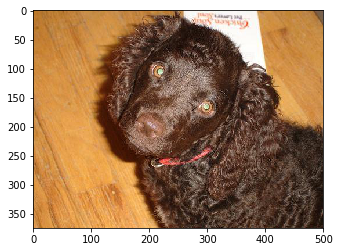

In [33]:
## Execute algorithm 

predict_dog_breed('images/American_water_spaniel_00648.jpg')


Human face is detected
The image look like a ...
 in/100.Lowchen


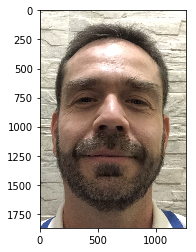

In [34]:
predict_dog_breed('images/Eduardo.jpg')


Dog is detected
The image look like a ...
 in/037.Brittany


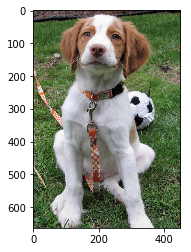

In [35]:
predict_dog_breed('images/Brittany_02625.jpg')


No human face or dog detected 
The image look like a ...
 in/013.Australian_terrier


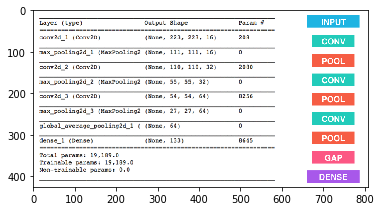

In [36]:
predict_dog_breed('images/sample_cnn.png')


No human face or dog detected 
The image look like a ...
 in/008.American_staffordshire_terrier


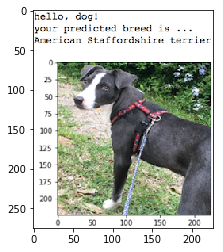

In [37]:
predict_dog_breed('images/sample_dog_output.png')


Dog is detected
The image look like a ...
 in/055.Curly-coated_retriever


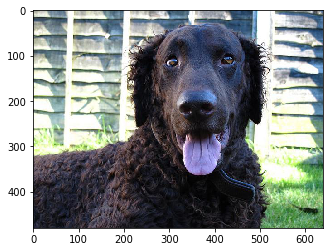

In [38]:
predict_dog_breed('images/Curly-coated_retriever_03896.jpg')